In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-84.1840256155444 157.92554555902996
25.21906084152438 128.33360677922968
61.31141899514196 75.969835796984
64.31962624831004 155.33946642336895
-23.04214862757948 -150.53404403623492
25.61338619374574 -9.189078487628166
-57.10087567215412 97.79744533547671
89.04389321477538 22.050036937194307
2.6978609927086126 93.89256600441945
-75.47134344740213 139.10261288966245
-48.48680462228172 -167.16477905396164
-11.764093351467523 -53.52545165761504
-64.3823257970532 33.74990335735251
-79.25712437552906 103.22796942843843
-26.22564498190375 -66.9414990167441
58.20237660519973 -119.75123816551825
2.523961295851805 -1.6612351825173448
-76.6768995754328 178.46135899330318
-3.065088538849764 120.9800625161385
88.7623589880246 9.75991864963376
-12.52642319308103 111.22727000379052
-32.266567600171776 -64.6548437489982
73.64993827737229 7.4229347090044655
57.521378393380814 -153.3123212557494
39.800510028216394 -36.98153347901436
-72.19757120160389 50.66616879297226
-42.38677906671856 -9.767667836

68.19190844515336 178.50376606284976
51.28939499738058 76.9693190271297
42.56660455200441 100.37243293479634
-6.658764023563549 -167.84815170086554
-82.6909437840899 -173.04738750006
41.42981216147666 -85.49097831224657
-29.63981637255646 105.99131249120774
-15.365321712193719 -123.58926834472607
-32.21208171756765 117.59222359588227
10.677560884235405 -161.0237633456597
-45.67432365768841 -81.83063992538472
-33.81269320840908 -30.767093085793107
52.64037335704995 162.42119933650844
38.126730559401096 98.96281263190639
56.52512344984774 34.459312717857415
-41.55351006520041 -95.49585563681246
53.7076823570859 -90.42826295762521
22.95365207074775 -30.331603338843905
73.21054384082731 140.02357971942797
28.459298419217745 43.01420958579868
-35.02709859403189 89.01778677953519
-63.04606426890737 135.99621677360568
-75.97221371026406 153.57524259218923
-55.83553001831481 -163.36560853660157
5.504558184565482 -93.77322507784274
85.03190520163204 -123.27519399145083
72.05335201992233 176.432

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | itoman
Processing Record 3 of Set 1 | megion
Processing Record 4 of Set 1 | dukat
Processing Record 5 of Set 1 | moerai
Processing Record 6 of Set 1 | tiznit
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | meulaboh
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | alta floresta
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | tucuman
Processing Record 16 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 17 of Set 1 | takoradi
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | rantepao
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | boyolangu
Processing Record 22 of 

Processing Record 39 of Set 4 | kifri
Processing Record 40 of Set 4 | ruwi
Processing Record 41 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 4 | ware
Processing Record 43 of Set 4 | kungalv
Processing Record 44 of Set 4 | liling
Processing Record 45 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | los chiles
Processing Record 48 of Set 4 | kendari
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 5 | ponta delgada
Processing Record 2 of Set 5 | geresk
City not found. Skipping...
Processing Record 3 of Set 5 | port hardy
Processing Record 4 of Set 5 | te anau
Processing Record 5 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 5 | saint-augustin
Processing Record 7 of Set 5 | saleaula
City not found. Skipping...
Processing Record 8 of Set 5 | ket

Processing Record 24 of Set 8 | champerico
Processing Record 25 of Set 8 | kotovo
Processing Record 26 of Set 8 | arinos
Processing Record 27 of Set 8 | marechal candido rondon
Processing Record 28 of Set 8 | disna
Processing Record 29 of Set 8 | biograd na moru
Processing Record 30 of Set 8 | benito juarez
Processing Record 31 of Set 8 | coffs harbour
Processing Record 32 of Set 8 | vanimo
Processing Record 33 of Set 8 | chara
Processing Record 34 of Set 8 | sola
Processing Record 35 of Set 8 | dali
Processing Record 36 of Set 8 | naze
Processing Record 37 of Set 8 | saskylakh
Processing Record 38 of Set 8 | charters towers
Processing Record 39 of Set 8 | gat
Processing Record 40 of Set 8 | tarutyne
Processing Record 41 of Set 8 | khorixas
Processing Record 42 of Set 8 | caravelas
Processing Record 43 of Set 8 | thunder bay
Processing Record 44 of Set 8 | molina
Processing Record 45 of Set 8 | beboto
Processing Record 46 of Set 8 | porto velho
Processing Record 47 of Set 8 | aykino
Pr

Processing Record 12 of Set 12 | tiruvottiyur
City not found. Skipping...
Processing Record 13 of Set 12 | riohacha
Processing Record 14 of Set 12 | eyl
Processing Record 15 of Set 12 | celestun
Processing Record 16 of Set 12 | dauphin
Processing Record 17 of Set 12 | conceicao do rio verde
Processing Record 18 of Set 12 | tanout
Processing Record 19 of Set 12 | tshikapa
Processing Record 20 of Set 12 | kazachka
Processing Record 21 of Set 12 | yamada
Processing Record 22 of Set 12 | totness
Processing Record 23 of Set 12 | ati
Processing Record 24 of Set 12 | paamiut
Processing Record 25 of Set 12 | boa vista
Processing Record 26 of Set 12 | orlovskiy
Processing Record 27 of Set 12 | alice springs
Processing Record 28 of Set 12 | hay river
Processing Record 29 of Set 12 | balcesti
Processing Record 30 of Set 12 | pudozh
Processing Record 31 of Set 12 | axim
Processing Record 32 of Set 12 | prince rupert
Processing Record 33 of Set 12 | baykit
Processing Record 34 of Set 12 | kununurra

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,41.81,65,77,22.50,NZ,2022-05-20 02:44:17
1,Itoman,26.1247,127.6694,77.02,96,75,17.27,JP,2022-05-20 02:44:18
2,Megion,61.0296,76.1136,50.02,83,99,15.05,RU,2022-05-20 02:44:19
3,Dukat,62.5500,155.5500,35.17,89,100,8.90,RU,2022-05-20 02:44:19
4,Moerai,-22.4333,-151.3333,77.40,73,9,8.66,PF,2022-05-20 02:44:20
5,Tiznit,29.5833,-9.5000,67.21,60,15,2.57,MA,2022-05-20 02:44:20
6,Busselton,-33.6500,115.3333,65.25,68,88,6.62,AU,2022-05-20 02:44:21
7,Longyearbyen,78.2186,15.6401,30.04,64,75,8.05,SJ,2022-05-20 02:42:46
8,Meulaboh,4.1363,96.1285,83.05,71,100,2.82,ID,2022-05-20 02:44:21
9,Hobart,-42.8794,147.3294,57.25,64,40,2.30,AU,2022-05-20 02:40:49


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-05-20 02:44:17,-46.6000,168.3333,41.81,65,77,22.50
1,Itoman,JP,2022-05-20 02:44:18,26.1247,127.6694,77.02,96,75,17.27
2,Megion,RU,2022-05-20 02:44:19,61.0296,76.1136,50.02,83,99,15.05
3,Dukat,RU,2022-05-20 02:44:19,62.5500,155.5500,35.17,89,100,8.90
4,Moerai,PF,2022-05-20 02:44:20,-22.4333,-151.3333,77.40,73,9,8.66
5,Tiznit,MA,2022-05-20 02:44:20,29.5833,-9.5000,67.21,60,15,2.57
6,Busselton,AU,2022-05-20 02:44:21,-33.6500,115.3333,65.25,68,88,6.62
7,Longyearbyen,SJ,2022-05-20 02:42:46,78.2186,15.6401,30.04,64,75,8.05
8,Meulaboh,ID,2022-05-20 02:44:21,4.1363,96.1285,83.05,71,100,2.82
9,Hobart,AU,2022-05-20 02:40:49,-42.8794,147.3294,57.25,64,40,2.30


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

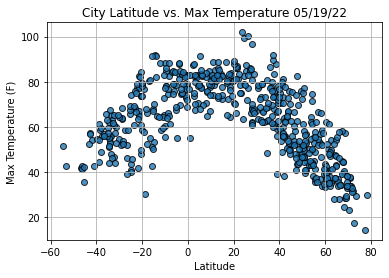

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

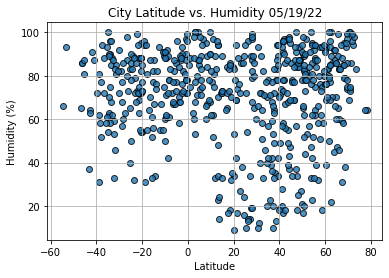

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

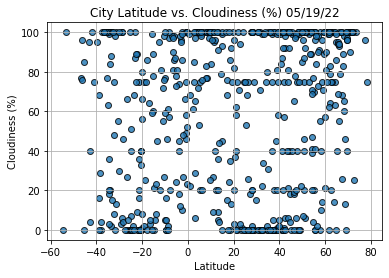

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

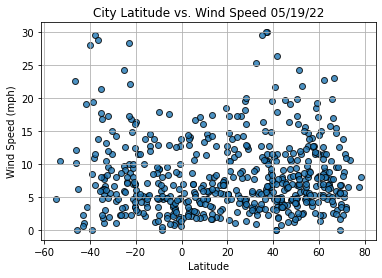

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2022-05-20 02:42:33
Lat                       42.6001
Lng                      -73.9662
Max Temp                    56.05
Humidity                       86
Cloudiness                     92
Wind Speed                   4.85
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
562     True
563     True
564     True
565     True
566     True
Name: Lat, Length: 567, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Itoman,JP,2022-05-20 02:44:18,26.1247,127.6694,77.02,96,75,17.27
2,Megion,RU,2022-05-20 02:44:19,61.0296,76.1136,50.02,83,99,15.05
3,Dukat,RU,2022-05-20 02:44:19,62.5500,155.5500,35.17,89,100,8.90
5,Tiznit,MA,2022-05-20 02:44:20,29.5833,-9.5000,67.21,60,15,2.57
7,Longyearbyen,SJ,2022-05-20 02:42:46,78.2186,15.6401,30.04,64,75,8.05


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

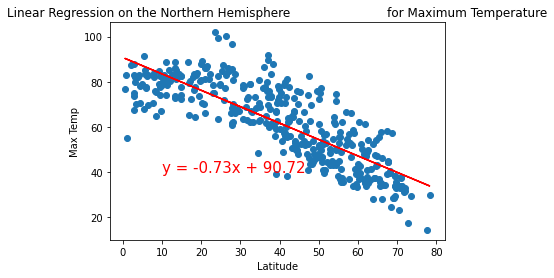

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

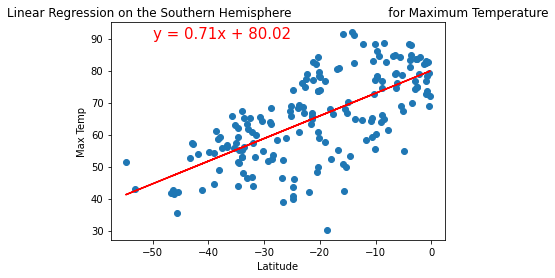

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

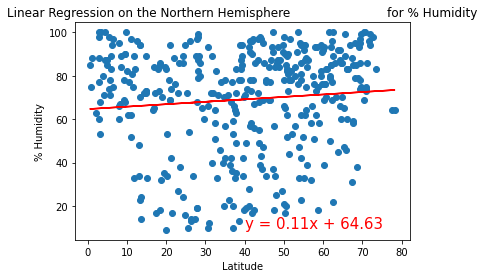

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

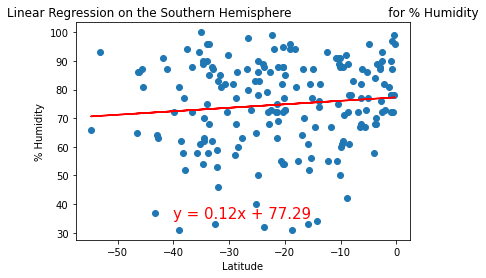

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-40,35))

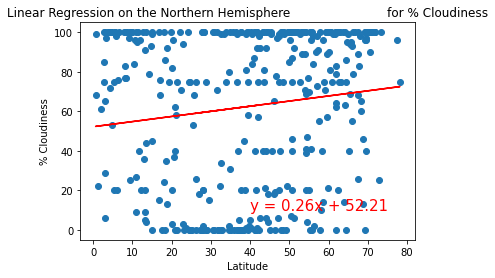

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

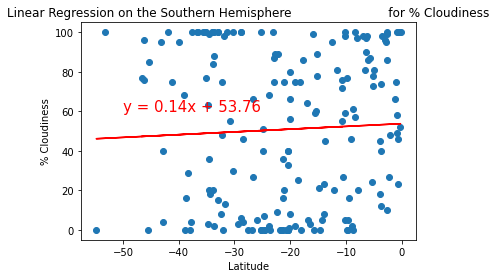

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

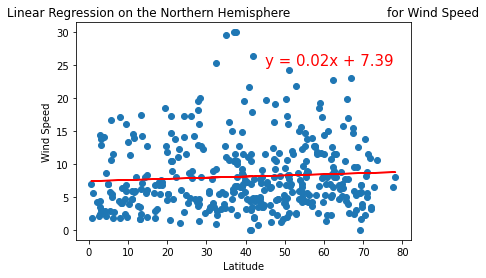

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,25))

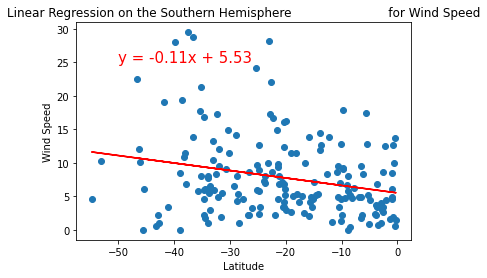

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))